In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#FOR PLOTTING GRAPHS

def summarize_diagnostics(history):

  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy / Training Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification / Training Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout()


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
def vgg_16():
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  model.trainable = False
  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
  # define new model
  model = Model(inputs=model.inputs, outputs=output)

  opt = SGD(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 184s 9s/step - loss: 1.0651 - accuracy: 0.9438 - val_loss: 4.6798e-10 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 144s 7s/step - loss: 0.1274 - accuracy: 0.9937 - val_loss: 0.2359 - val_accuracy: 0.9750
Epoch 3/5
20/20 [==============================] - 144s 7s/step - loss: 2.9221e-06 - accuracy: 1.0000 - val_loss: 0.2349 - val_accuracy: 0.9750
Epoch 4/5
20/20 [==============================] - 142s 7s/step - loss: 2.2693e-06 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9750
Epoch 5/5
5/5 [==============================] - 25s 5s/step - loss: 0.2335 - accuracy: 0.9750
> Testing Accuracy: 97.500
Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 224, 224, 3)]    

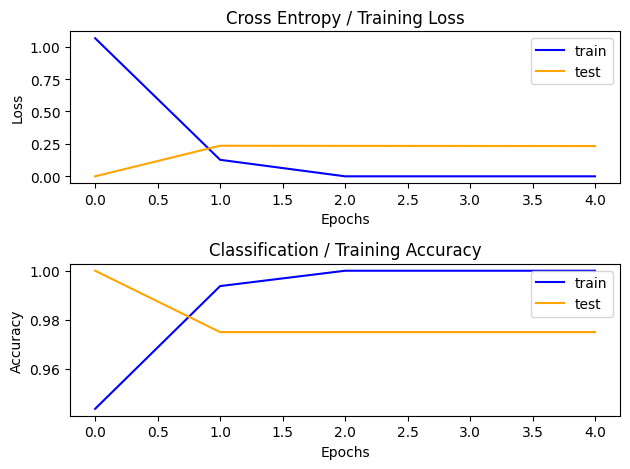

In [ ]:
model = vgg_16()

datagen = ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

train_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/train', class_mode='binary', batch_size=8, target_size=(224, 224))
test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test/', class_mode='binary', batch_size=8, target_size=(224, 224))

history = model.fit(train_it, validation_data = test_it, epochs=5)
loss, acc = model.evaluate(test_it, steps = len(test_it))

print('> Testing Accuracy: %.3f' % (acc * 100.0))
print(model.summary(show_trainable = True))

summarize_diagnostics(history)
